In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB

In [38]:
dataset=pd.read_csv('Day.csv')

In [39]:
X=dataset.iloc[:,1:5]
X.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,False
1,Sunny,Hot,High,True
2,Overcast,Hot,High,False
3,Rain,Mild,High,False
4,Rain,Cool,Normal,False


In [31]:
Y=dataset.iloc[:,-1]
Y.head()
#Y=Y.apply(le.fit_transform)
#Y.head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Class: Play Ball, dtype: object

In [40]:
le=preprocessing.LabelEncoder()
X=X.apply(le.fit_transform)
X.head()

,Outlook,Temperature,Humidity,Wind
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [32]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=0) 
X_train.head()
X_test.head()

,Outlook,Temperature,Humidity,Wind
8,2,0,1,0
6,0,0,1,1
4,1,0,1,0
11,0,2,0,1
2,0,1,0,0


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


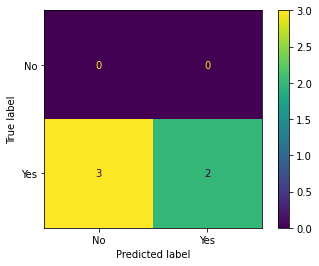

In [33]:
NB=GaussianNB()
NB.fit(X_train,Y_train)
Y_pred=NB.predict(X_test)
acc_NB=round(NB.score(X_train,Y_train)*100,2)
cm=confusion_matrix(Y_test,Y_pred)
plot_confusion_matrix(NB,X_test,Y_test)

In [34]:
accuracy=accuracy_score(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred,average='micro')
recall=recall_score(Y_test,Y_pred,average='micro')
f1=f1_score(Y_test,Y_pred,average='micro')
print('Confusion Matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f'%accuracy)
print('precision_Naive Bayes: %.3f'%precision)
print('recall_Naive Bayes: %.3f'%recall)

Confusion Matrix for Naive Bayes
 [[0 0]
 [3 2]]
accuracy_Naive Bayes: 0.400
precision_Naive Bayes: 0.400
recall_Naive Bayes: 0.400


In [36]:
print(classification_report(Y_test,Y_pred,labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         0
         Yes       1.00      0.40      0.57         5

    accuracy                           0.40         5
   macro avg       0.50      0.20      0.29         5
weighted avg       1.00      0.40      0.57         5



/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
